<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/notebooks/2020SightVisit001_mxt_jogai_01_chapt3_16exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 出典: 2020-0702情報とデータサイエンスpart2

## 参考資料
文部科学省の[高等学校情報科「情報II」教員研修用教材(本編)](https://www.mext.go.jp/a_menu/shotou/zyouhou/detail/mext_00742.html) に掲載されている情報

- [第3章 情報とデータサイエンス 前半](https://www.mext.go.jp/content/20200702-mxt_jogai01-000007843_004.pdf)
- [第3章 情報とデータサイエンス 後半](https://www.mext.go.jp/content/20200609-mxt_jogai01-000007843_007.pdf)

### page 156. 演習 2 引用

カリフォルニア大学アーバイン校（UCI）が運営する機械学習用データ配布サイトで公開されている卸売業者の顧客データを用いて，顧客をクラスタリングし，どのような顧客が購入しているか分析してみましょう。

[UCI](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers) から，卸売業者のデータのファイル名を `Wholesale_customers_data.csv` に変更してダウンロードする。
そのファイルから，プログラムを用いてデータを読み込む。

```python
import pandas as pd
df = pd.read_csv("Wholesale_customers_data.csv")
```

このデータは，8個の属性から構成されており，1行1顧客のデータとなっている。
このうち，6個の属性が年間注文額となっており，これらの属性を用いてクラスタリングを行う。

```python
sub_cols=df[['Fresh','Milk', 'Grocery','Frozen', 'Detergents_Paper','Delicassen']]
```

金額を用いてクラスタリングを行いたいので，値の基準化は行わない。次にクラスタ数と SSE の関係をグラフに描き，クラスタ数をエルボー法で推定する 図表８。
グラフを見ると，極端に折れ曲がっているクラスタ数はないが，クラスタ数が5の場合の点からゆるやかに減少していることから，クラスタ数を 5 とする。

```python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
dist_list=[]
for i in range( 1, 11 ):
kmeans = KMeans( init='random',
n_clusters=i,random_state=0 )
y_km = kmeans.fit( sub_cols )
dist_list.append( kmeans.inertia_ )
plt.plot(range(1,11),dist_list,marker='*',
markersize=10)
plt.xlabel('クラスタ数')
plt.ylabel('クラスタ内誤差の平方和　SSE')
```

次にk-means法によりクラスタリングする。

```python
kmeans = KMeans( init='random', n_clusters=5, random_state=0 )
pred = kmeans.fit_predict( sub_cols )
df['cluster_id'] = pred
```

このようにクラスタリングしたデータの特徴を，属性ごとに平均値を求めて調べる（凡例の位置は調整してある）図表９。

```python
clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo['clust_' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop(['Channel','Region','cluster_id'])
clusterinfo.T.plot.bar(stacked=True)
```

また，各クラスタに含まれるデータ数を次のプログラムで調べる 図表10。

```python
labels = pd.Series(kmeans.labels_,name='cluster_number')
ax=labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('クラスタ番号')
ax.set_ylabel('データ数')
```


In [1]:
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

In [2]:
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
r = requests.get(url, allow_redirects=True)
open('wholesales_customers_data.csv', 'wb').write(r.content)
#!ls *.csv

15021

In [3]:
import pandas as pd
df = pd.read_csv('wholesales_customers_data.csv')

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
sub_cols = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [7]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 6.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=86aed1da42c54e353d9c82fe1ade7f9a7ddbe70a4da81c629dfde47edb9bf97a
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


Text(0, 0.5, 'クラスタ内誤差平均')

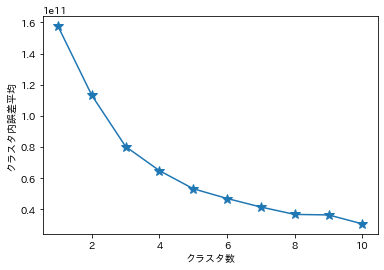

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
from sklearn.cluster import KMeans

dist_list = []
for i in range(1, 11):
    kmeans = KMeans(init='random', n_clusters=i, random_state=0)
    y_km = kmeans.fit(sub_cols)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,11), dist_list, marker='*', markersize=10)
plt.xlabel('クラスタ数')
plt.ylabel('クラスタ内誤差平均')

In [9]:
# 次にk-means法によりクラスタリングする。
kmeans = KMeans(init='random', n_clusters=5, random_state=0)
pred = kmeans.fit_predict( sub_cols )
df['cluster_id'] = pred

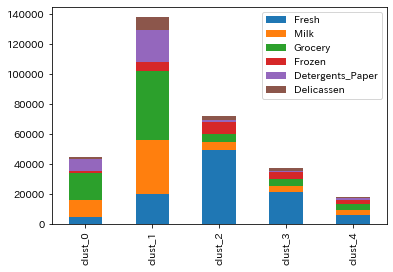

In [10]:
# このようにクラスタリングしたデータの特徴を，属性ごとに平均値を求めて調べる（凡例の位置は調整してある）図表９。

clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo['clust_' + str(i)] = df[df['cluster_id'] == i].mean()

clusterinfo = clusterinfo.drop(['Channel','Region','cluster_id'])
clusterinfo.T.plot.bar(stacked=True)

Text(0, 0.5, 'データ数')

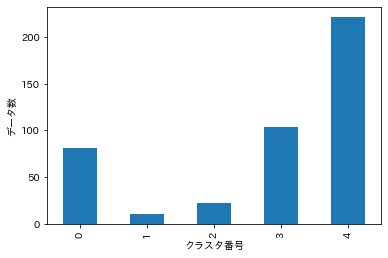

In [11]:
# また，各クラスタに含まれるデータ数を次のプログラムで調べる 図表10。

labels = pd.Series(kmeans.labels_,name='cluster_number')
ax=labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('クラスタ番号')
ax.set_ylabel('データ数')
